<a href="https://colab.research.google.com/github/AhmadNass7/teaching/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

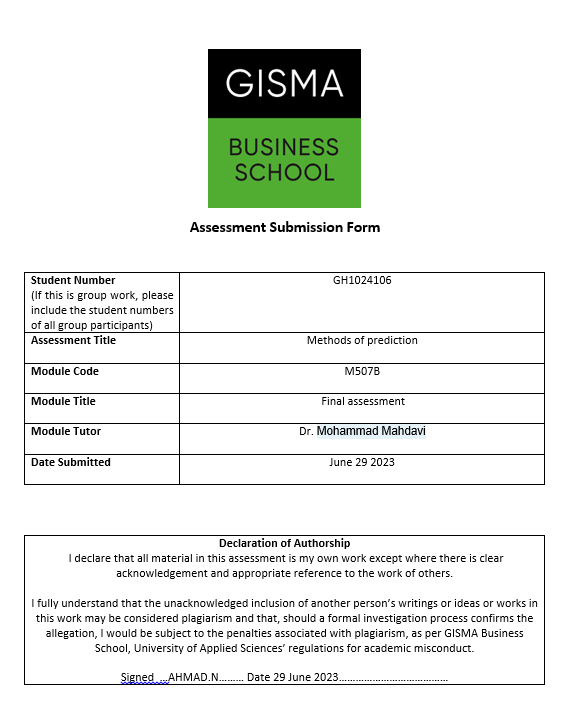

## A Brief Summary of the Given Data Set

* This Given Data Set briefly discusses the main factors/feautures that leads to heart diseases. Heart affection is one of the most dangerous diseases that a human being can have. I as a data scientist will perfom a machine learning pipeline that discusses which factors determines the presence of heart disease.

* Given Information of this Data Set:

* age

*sex

*chest pain type (4 values)

*resting blood pressure

*serum cholestoral in mg/dl

*fasting blood sugar > 120 mg/dl

*resting electrocardiographic results (values 0,1,2)

*maximum heart rate achieved

*exercise induced angina

*oldpeak = ST depression induced by exercise relative to rest

*the slope of the peak exercise ST segment

*number of major vessels (0-3) colored by flourosopy

*thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

* Target, 0 = no disease and 1 = disease


* Heart Disease Data Set, found at: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Importing Libraries

## Importing the given Libraries to be able to run our codes succesfully.

In [ ]:
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import imblearn.over_sampling
import sklearn.ensemble
import sklearn.linear_model


## Loading the Given Data Set

## Implementing our Data Set about Heart disease showing its feature , and printing the first 10 columns.

In [ ]:
df= pd.read_csv("heart disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


## Splitting the Data Set into Training and Testing

## Splitting the Given Data Set into training and testing to evaluate the perfomance of the pipeline and for later to be able to match our predictions. It is concluded that 768 of this Data Set were trained whereas 257 were tested.

In [ ]:
df_train, df_test= sklearn.model_selection.train_test_split(df)


print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (768, 14)
df_test size: (257, 14)


In [ ]:
for i in df_train.columns:
  print(i)
print(df_train[i].unique(),"\n")

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
[1 0] 



## Data Exploration

## Coming to his step i used a loop function to search out  for implicit missing values. Implicit missing values are basically sort of  elements that indicates missing data. Implicit values should be sorted since they implement   a large out turn on the data Set and can result in the affectiveness of our pedictions and conclusions.

In [ ]:
for i in df_train.columns:   print(i)
print(df_train[i].unique(),"\n")






age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
[1 0] 



In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## It is predicted that 132 people were not affected by heart disease , and on the other hand, 125 were affected.

In [ ]:
df_test["target"].value_counts()

1    131
0    126
Name: target, dtype: int64

## Data Processing and Feature Engineering

## After implementing this fucntion it is shown that my Data Set doesnt contain any missing values.

In [ ]:
df_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Implementing the Given Features and The Target Label

## This Step basically includes the differentiation or seperation of the given features from the target(presence of heart disease) label of the given data set. What is this model trying to prove or predict?. From this sort of question, we can easily conclude that our purpose here is to predit which features lead to the effect of heart disease.

In [ ]:
x_train= df_train.drop(["target"], axis=1)
y_train= df_train["target"]

x_test= df_test.drop(["target"], axis=1)
y_test= df_test["target"]






## Implementing the "one-hot Encoder" function is basically a function that converts categorical variables into numerical variables which means to be read or implemented as binary values since machince learning can only deal with binary values such as (O and 1) to be able to understand it and give an effective result.

In [ ]:


MOP= sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore")
MOP.fit(x_train)


x_train= MOP.transform(x_train)


x_test= MOP.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (768, 398)
x_test: (257, 398)


## Standardlization is the process of redeeming the features into a normalized scale meaning that to obtain a normalized distributions of feature, this will sustain in improving the performance of the machine learning pipeline.

In [ ]:

standardlization= sklearn.preprocessing.StandardScaler(with_mean=False)
standardlization.fit(x_train)


x_train= standardlization.transform(x_train)


x_test= standardlization.transform(x_test)



## Usuage of Smote method to make sure that the number of smaples are well balanced, which will lead to the improvement of performance of our pipeline.

In [ ]:
smote = imblearn.over_sampling.SMOTE(random_state=25)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


## Implementing the Given Algorithms Used.

## I chose to work with 4 given algorithms to encounter the accuracy of each algorithm in this machine learning pipeline. The 4 algorithms used are : Random Forest, Gradient Boosting , Perceptron, Ensemble(Bagging Regressor)

In [ ]:
model_ensemble_learning= sklearn.ensemble.BaggingClassifier()
model_random_forest= sklearn.ensemble.RandomForestClassifier()
model_gradient_boositng= sklearn.ensemble.GradientBoostingRegressor()
model_perceptron= sklearn.linear_model.Perceptron()
model_logistic_regression=model_logistic_regression= sklearn.linear_model.LogisticRegression()

## Random Forest Algorithm

## Implmenting Random Forest model algorithm with its unique hyperparameters to determine the accuracy using the "RandomizedSearchCV" .

In [ ]:
parameters_random_forest= {
    "criterion": ["gini", "entropy"],
    "n_estimators": range(50,100,50),
}
model_random_forest= sklearn.ensemble.RandomForestClassifier()
ann_random_forest= sklearn.model_selection.RandomizedSearchCV(model_random_forest,parameters_random_forest,  scoring='accuracy', cv= 5, n_jobs=-1)
ann_random_forest.fit(x_train, y_train)
print("The best score of our tunned model is",ann_random_forest.best_score_)
print("The best hyperparameter of our tunned model is",ann_random_forest.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best score of our tunned model is 0.9843561667091079
The best hyperparameter of our tunned model is {'n_estimators': 50, 'criterion': 'entropy'}


## Gradient boosting Algorithm

## Implmenting Gradient Boosting model algorithm with its unique hyperparameters to determine the accuracy using the "RandomizedSearchCV" .

In [ ]:
parameters_gradient_boosting= {
    "learning_rate":[0.01, 0.01, 0.2],
    "n_estimators": range(50,260,50),
}
model_gradient_boosting= sklearn.model_selection.RandomizedSearchCV(sklearn.ensemble.GradientBoostingClassifier(),
                                              parameters_gradient_boosting, scoring="accuracy", cv=5, n_jobs=-1)
model_gradient_boosting.fit(x_train, y_train)
print("Accuracy of the best Gradient Boosting classifer={:.2f}".format(model_gradient_boosting.best_score_))
print("best found hyperparameters of Gradient Boosting classifier ={}".format(model_gradient_boosting.best_params_))

Accuracy of the best Gradient Boosting classifer=0.97
best found hyperparameters of Gradient Boosting classifier ={'n_estimators': 150, 'learning_rate': 0.2}


## Perceptron Algorithm

## Implmenting Perceptron model algorithm with its unique hyperparameters to determine the accuracy using the "RandomizedSearchCV" .

In [ ]:
parameters_perceptrons= {'alpha':[0.0001], 'tol':[0.01]}
model_perceptrons= sklearn.linear_model.Perceptron()
clf_perceptrons=sklearn.model_selection.RandomizedSearchCV(model_perceptrons,parameters_perceptrons, scoring='accuracy', cv= 5, n_jobs=-1)
clf_perceptrons.fit(x_train, y_train)
print("The best score of our tunned model is",clf_perceptrons.best_score_)
print("The best score of our tunned model is",clf_perceptrons.best_params_)

The best score of our tunned model is 0.9700364994482642
The best score of our tunned model is {'tol': 0.01, 'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## Ensemble/ Bagging Classifier Algorithm

## Implmenting Ensemble/Bagging Classifier model algorithm with its unique hyperparameters to determine the accuracy using the "RandomizedSearchCV" .

In [ ]:
parameters_bagging_classifier= {'n_estimators':[10], 'max_samples':[5]}
model_bagging_classifier= sklearn.ensemble.BaggingClassifier()
clf_bagging_classifier=sklearn.model_selection.RandomizedSearchCV(model_random_forest,parameters_random_forest, scoring='accuracy', cv= 5, n_jobs=-1)
clf_bagging_classifier.fit(x_train, y_train)
print("The best score of our tunned model is",clf_bagging_classifier.best_score_)
print("The best score of our tunned model is",clf_bagging_classifier.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best score of our tunned model is 0.9817332993803582
The best score of our tunned model is {'n_estimators': 50, 'criterion': 'gini'}


## Logistic Regression

## Implmenting Logistic Regression model algorithm with its unique hyperparameters to determine the accuracy using the "RandomizedSearchCV" . Although logistic regression is used in the previous quarter but i implmented it to measure its accuracy comparing to these new algortihms since its basically focused on classification which fits my data set.

In [ ]:
parameters_logistic_regression={ 'C' :[0.1,1.0,3], 'random_state' : [7]}

model_logistic_regression= sklearn.linear_model.LogisticRegression(max_iter=500)

clf_logistic_regression=sklearn.model_selection.RandomizedSearchCV(model_logistic_regression,parameters_logistic_regression, scoring='accuracy', cv= 5, n_jobs=-1)

clf_logistic_regression.fit(x_train_resampled, y_train_resampled)
print("The best score of our tunned pipeline is",clf_logistic_regression.best_score_)
print("The best score of our tunned pipeline is",clf_logistic_regression.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best score of our tunned pipeline is 0.9772151898734178
The best score of our tunned pipeline is {'random_state': 7, 'C': 0.1}


## It is shown that Gradient Boosting algorithm gave the highest accuracy among all of the other algorithms.

## HyperTunning the Algorithms Used.

## Random Forest hypertuning

In [ ]:
y_pred_final= ann_random_forest.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_pred_final, y_test)
print(f"The accuracy of our final predictions using Random Forest  is {accuracy}")

The accuracy of our final predictions using Random Forest  is 0.9883268482490273


## Gradient Boosting Hypertunning

In [ ]:
y_pred_final= model_gradient_boosting.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_pred_final, y_test)
print(f"The accuracy of our final predictions using Gradient Boosting  is {accuracy}")

The accuracy of our final predictions using Gradient Boosting  is 0.9883268482490273


## Perceptron Hypertunning

In [ ]:
y_pred_final= clf_perceptrons.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_pred_final, y_test)
print(f"The accuracy of our final predictions using Perceptron  is {accuracy}")

The accuracy of our final predictions using Perceptron  is 0.9883268482490273


## Logistic Regression Hypertunning

In [ ]:
y_pred_final= clf_logistic_regression.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_pred_final, y_test)
print(f"The accuracy of our final predictions using Logistic Regression  is {accuracy}")

The accuracy of our final predictions using Logistic Regression  is 0.9883268482490273


## In conclusion, after implementing the above algorithms and hyper tuning them it shows that all of them have approximately similar accuracy.

## Conversion to HTML

In [ ]:
!jupyter nbconvert --to html heart.ipynb



[NbConvertApp] Converting notebook heart.ipynb to html
[NbConvertApp] Writing 720426 bytes to heart.html
